In [1]:
!pip install --user autopep8 

Processing /home/pan303/.cache/pip/wheels/7e/f5/4b/c19e6276126325eb8071b273347c05a830c37a82b9b3b81510/autopep8-1.4.4-py2.py3-none-any.whl
     |████████████████████████████████| 51kB 5.8MB/s  eta 0:00:01


In [5]:
!pip install sklearn

     |████████████████████████████████| 7.0MB 107kB/s  eta 0:00:01     |██████████████████████████▍     | 5.8MB 12.4MB/s eta 0:00:01
     |████████████████████████████████| 296kB 9.7MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=c1f357eb16cea28196e505c5eff2978546bdc01d8b919802587de1d19e7d423c
  Stored in directory: /home/pan303/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import time
import gc
#import psutil
import multiprocessing as mp
from zipfile import ZipFile
from tqdm import tqdm_notebook
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Zip File and location of the zip file.Extracting the zip fileusing the ZipExtraction Function
DataFile='microsoft-malware-prediction.zip'
def ZipExtraction(data):
    with ZipFile(DataFile, 'r') as zip: 
    # printing all the contents of the zip file
        zip.printdir() 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!') 
ZipExtraction(DataFile)

File Name                                             Modified             Size
sample_submission.csv                          2019-12-12 00:16:32    290570393
test.csv                                       2019-12-12 00:17:26   3795687226
train.csv                                      2019-12-12 00:25:34   4384966482
Extracting all the files now...
Done!


In [12]:
#loading the train data into Pandas Dataframe.We have used time and memory_usage to see how much time it takes to load the data and also the memory.Since the dataset is of 8.9 million rows it is tsaking a longer time and also lot of memory.Few of the approach to solve this problem is loading the data into chunk or changing the datatypes.
%time trainn=pd.read_csv('train.csv')
memory=trainn.memory_usage().sum()/1024**2
print("Memory used for loading train data: {:03.2f} MB".format(memory))

<string>:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 2min 35s, sys: 7.27 s, total: 2min 43s
Wall time: 2min 43s
Memory used for loading train data: 3281.05 MB


In [20]:
trainn.shape

(5181378, 83)

In [21]:
#Checking the memory used by each type of datatype
for dtype in ['float','int','object']:
    datatype_oftrain = trainn.select_dtypes(include=[dtype])
    averagememinbytes = datatype_oftrain.memory_usage(deep=True).mean()
    averagememinmegabytes = averagememinbytes / 1024 ** 2
    print("Average memory usage for {} columns: {:04.3f} MB".format(dtype,averagememinmegabytes))

Average memory usage for float columns: 38.671 MB
Average memory usage for int columns: 35.138 MB
Average memory usage for object columns: 306.637 MB


In [2]:
#Few of the approach to solve this problem is loading the data into chunk or changing the datatypes.In our problem we have changed the datatype 'object' into category as it is seen it is consuming lot of memory and we have changed few float64 and float32 into float 16 so that memory used is less and also data is loaded quickly.
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
%time train=pd.read_csv('train.csv',dtype=dtypes)
memory=train.memory_usage().sum()/1024**2
print("Memory used for loading train data: {:03.2f} MB".format(memory))

CPU times: user 1min 52s, sys: 6.23 s, total: 1min 59s
Wall time: 1min 59s
Memory used for loading train data: 1919.99 MB


In [ ]:
#It can be seen that the memory used for loading the training data is much less than what we did before.
#Checking the memory used by each type of datatype
for dtype in ['float','int','category']:
    datatype_oftrain = train.select_dtypes(include=[dtype])
    averagememinbytes = datatype_oftrain.memory_usage(deep=True).mean()
    averagememinmegabytes = averagememinbytes / 1024 ** 2
    print("Average memory usage for {} columns: {:04.3f} MB".format(dtype,averagememinmegabytes))

In [14]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [30]:
reduce_mem_usage(train)

NameError: name 'reduce_mem_usage' is not defined

In [11]:
#Now as we have loaded the dataset now we  can perform initial inspection to see about its features.

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
DefaultBrowsersIdentifier                            float32
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                         

In [32]:
train.describe()

KeyboardInterrupt: 

In [ ]:


#From the inspection of data it is foundd that there are lot of features with Nan values , We have to perform various type of analysis like outlier,univariate and bivariate and collinearity before we prepare the train data because this type of data can adversely affect the perform i.e accuracy of our model.


In [33]:
#stats function is used to go through each column in the dataset to finf the number of unique values in each feature and the percentage of missing values.
def stats(data):
    statistics = []
    for col in data.columns:
        statistics.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
        stats = pd.DataFrame(statistics, columns=['Feature', 'Unique_values', 'Percentage_of_missing_values', 'Percentage_in_biggest_category', 'type'])
        a=stats.sort_values('Percentage_of_missing_values', ascending=False)
    return a
stats(train)


,Feature,Unique_values,Percentage_of_missing_values,Percentage_in_biggest_category,type
28,PuaMode,2,99.974119,99.974119,category
41,Census_ProcessorClass,3,99.589407,99.589407,category
8,DefaultBrowsersIdentifier,2017,95.141637,95.141637,float32
68,Census_IsFlightingInternal,2,83.044030,83.044030,float16
52,Census_InternalBatteryType,78,71.046809,71.046809,category
71,Census_ThresholdOptIn,2,63.524472,63.524472,float16
75,Census_IsWIMBootEnabled,2,63.439038,63.439038,float16
31,SmartScreen,21,35.610795,48.379658,category
15,OrganizationIdentifier,49,30.841487,47.037662,float16
29,SMode,2,6.027686,93.928812,float16


In [4]:
def removingfeatures(data,percentagethreshold,singlecategorythreshold):
    '''
    removing features where null value > percentagethreshold and 
    '''
    column=data.columns
    finalfeatures = column.tolist()

    for col in data.columns:
    
    # remove columns with high NA rate
        nullpercentage = data[col].isnull().sum() / data.shape[0]
       
        singlecatgory= data[col].value_counts(normalize=True, dropna=False).values[0]
    
        if nullpercentage > percentagethreshold:
            finalfeatures.remove(col)
        elif singlecatgory > singlecategorythreshold:
            finalfeatures.remove(col)
    return finalfeatures

In [5]:
finalFeatures=removingfeatures(train,0.50,0.90)

In [36]:
del trainn

In [6]:
#Now we have ddrop more than 25 features and the dataset is updated
train=train.filter(finalFeatures)

In [7]:
train.shape

(8921483, 53)

In [8]:
#now let us split the dataset into catgorical and numerical/binary column type to understand each column and attributes.
def identifydatatye(data):
    catcolumns = list(train.loc[:, data.dtypes =="category"].columns)
    numerical_and_binary_columns = list(data.loc[:, data.dtypes !="category"].columns)
    numcolumns = numerical_and_binary_columns
    bincolumns = []
    for col in (numerical_and_binary_columns):
        if data[col].nunique() == 2:
            bincolumns.append(col)
            numcolumns.remove(col)
    return numcolumns,bincolumns,catcolumns

In [9]:
numericalcolumns,binarycolumns,categoricalcolumns=identifydatatye(train)

In [10]:
numericalcolumns

['AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsTouchEnabled',
 'Wdft_RegionIdentifier']

In [11]:
binarycolumns

['Census_IsSecureBootEnabled', 'Wdft_IsGamer', 'HasDetections']

In [12]:
categoricalcolumns

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [1]:
target=train['HasDetections']

NameError: name 'train' is not defined

In [46]:

train['Census_IsFlightingInternal'].value_counts().head(10).plot.bar()


KeyError: 'Census_IsFlightingInternal'

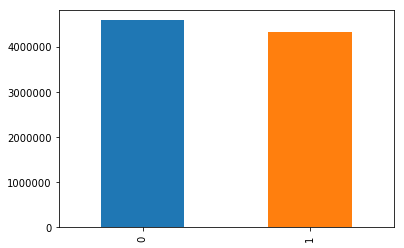

In [29]:
train['Census_IsSecureBootEnabled'].value_counts().head(10).plot.bar()

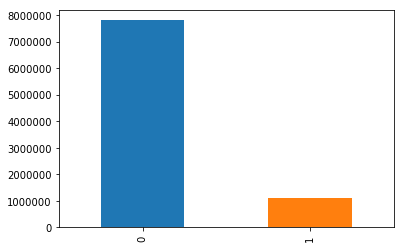

In [30]:
train['Census_IsTouchEnabled'].value_counts().head(10).plot.bar()

In [31]:
def plotbinaryfeature(col,top_n=2):
    top_n = top_n if train[col].nunique() > top_n else train[col].nunique()
    print(f"{col} has {train[col].nunique()} unique values and type: {train[col].dtype}.")
    print(train[col].value_counts(normalize=True, dropna=False).head())
    top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
    df0 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 1), col].value_counts().head(10).sort_index()
    df1 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 0), col].value_counts().head(10).sort_index()
    data = [go.Bar(x=df0.index, y=df0.values, name='Has Detections'),
            go.Bar(x=df1.index, y=df1.values, name='No Detections')]

    layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories",
                        xaxis = dict(title = f'{col}',
                                     showgrid=False,
                                     zeroline=False,
                                     showline=False,),
                        yaxis = dict(title = 'Counts',
                                     showgrid=False,
                                     zeroline=False,
                                     showline=False,),
                        ),
                   legend=dict(orientation="v"), barmode='group')



 
    py.iplot(dict(data=data, layout=layout))

In [32]:
plotbinaryfeature('Census_IsTouchEnabled')

Census_IsTouchEnabled has 2 unique values and type: int8.
0    0.874457
1    0.125543
Name: Census_IsTouchEnabled, dtype: float64


In [33]:
plotbinaryfeature('Census_IsSecureBootEnabled')

Census_IsSecureBootEnabled has 2 unique values and type: int8.
0    0.513977
1    0.486023
Name: Census_IsSecureBootEnabled, dtype: float64


In [34]:
#Now let us perform outlier analysis i.e univariate and multivariate analysis
def plot_categorical_feature(col, only_bars=False, top_n=10):
    top_n = top_n if train[col].nunique() > top_n else train[col].nunique()
    print(f"{col} has {train[col].nunique()} unique values and type: {train[col].dtype}.")
    print(train[col].value_counts(normalize=True, dropna=False).head())
    if not only_bars:
            df = train.groupby([col]).agg({'HasDetections': ['count', 'mean']})
            df = df.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
            data = [go.Bar(x=df.index, y=df['HasDetections']['count'].values, name='counts'),
                    go.Scatter(x=df.index, y=df['HasDetections']['mean'], name='Detections rate', yaxis='y2')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories and mean target value",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis2=dict(title='Detections rate', overlaying='y', side='right')),
                           legend=dict(orientation="v"))

    else:
            top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
            df0 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 1), col].value_counts().head(10).sort_index()
            df1 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 0), col].value_counts().head(10).sort_index()
            data = [go.Bar(x=df0.index, y=df0.values, name='Has Detections'),
                    go.Bar(x=df1.index, y=df1.values, name='No Detections')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                ),
                           legend=dict(orientation="v"), barmode='group')
        
    py.iplot(dict(data=data, layout=layout))
        
    

In [35]:
plot_categorical_feature('AVProductsInstalled', True)

AVProductsInstalled has 8 unique values and type: float16.
 1.0    0.695949
 2.0    0.275628
 3.0    0.023326
NaN     0.004060
 4.0    0.000982
Name: AVProductsInstalled, dtype: float64


In [36]:
plot_categorical_feature('EngineVersion', True)

EngineVersion has 70 unique values and type: category.
1.1.15200.1    0.430990
1.1.15100.1    0.412030
1.1.15000.2    0.029728
1.1.14901.4    0.023809
1.1.14600.4    0.018000
Name: EngineVersion, dtype: float64


In [37]:
plot_categorical_feature('AppVersion', True)

AppVersion has 110 unique values and type: category.
4.18.1807.18075    0.576050
4.18.1806.18062    0.095380
4.12.16299.15      0.040338
4.10.209.0         0.030539
4.13.17134.1       0.028837
Name: AppVersion, dtype: float64


In [38]:
plot_categorical_feature('AvSigVersion', False)

AvSigVersion has 8531 unique values and type: category.
1.273.1420.0    0.011469
1.263.48.0      0.010987
1.275.1140.0    0.010899
1.275.727.0     0.010362
1.273.371.0     0.009748
Name: AvSigVersion, dtype: float64


In [39]:
plot_categorical_feature('OsPlatformSubRelease', True)

OsPlatformSubRelease has 9 unique values and type: category.
rs4    0.438887
rs3    0.280635
rs2    0.087460
rs1    0.081917
th2    0.046136
Name: OsPlatformSubRelease, dtype: float64


In [40]:
plot_categorical_feature('OsBuildLab', True)

OsBuildLab has 663 unique values and type: category.
17134.1.amd64fre.rs4_release.180410-1804                 0.410044
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    0.140411
16299.15.amd64fre.rs3_release.170928-1534                0.107724
15063.0.amd64fre.rs2_release.170317-1834                 0.080484
17134.1.x86fre.rs4_release.180410-1804                   0.028815
Name: OsBuildLab, dtype: float64


In [41]:
plot_categorical_feature('SmartScreen', True)

SmartScreen has 21 unique values and type: category.
RequireAdmin    0.483797
NaN             0.356108
ExistsNotSet    0.117266
Off             0.020911
Warn            0.015186
Name: SmartScreen, dtype: float64


In [42]:
plot_categorical_feature('SkuEdition', True)

SkuEdition has 8 unique values and type: category.
Home          0.618097
Pro           0.361393
Invalid       0.008749
Education     0.004561
Enterprise    0.003851
Name: SkuEdition, dtype: float64


In [43]:
plot_categorical_feature('Census_MDC2FormFactor', True)

Census_MDC2FormFactor has 13 unique values and type: category.
Notebook       0.641521
Desktop        0.218695
Convertible    0.045438
Detachable     0.033429
AllInOne       0.032739
Name: Census_MDC2FormFactor, dtype: float64


In [44]:
plot_categorical_feature('Census_PrimaryDiskTypeName', True)

Census_PrimaryDiskTypeName has 4 unique values and type: category.
HDD            0.650879
SSD            0.276502
UNKNOWN        0.040156
Unspecified    0.031024
NaN            0.001440
Name: Census_PrimaryDiskTypeName, dtype: float64


In [45]:
plot_categorical_feature('Census_ChassisTypeName', True)

Census_ChassisTypeName has 52 unique values and type: category.
Notebook    0.588334
Desktop     0.209845
Laptop      0.076846
Portable    0.040453
AllinOne    0.022899
Name: Census_ChassisTypeName, dtype: float64


In [46]:
plot_categorical_feature('Census_ChassisTypeName', True)

Census_ChassisTypeName has 52 unique values and type: category.
Notebook    0.588334
Desktop     0.209845
Laptop      0.076846
Portable    0.040453
AllinOne    0.022899
Name: Census_ChassisTypeName, dtype: float64


In [47]:
plot_categorical_feature('Census_PowerPlatformRoleName', True)

Census_PowerPlatformRoleName has 10 unique values and type: category.
Mobile         0.693036
Desktop        0.231645
Slate          0.055208
Workstation    0.012294
SOHOServer     0.004242
Name: Census_PowerPlatformRoleName, dtype: float64


In [48]:
plot_categorical_feature('Census_InternalBatteryType', True)

Census_InternalBatteryType has 78 unique values and type: category.
NaN     0.710468
lion    0.227345
li-i    0.027531
#       0.020624
lip     0.006961
Name: Census_InternalBatteryType, dtype: float64


In [49]:
plot_categorical_feature('Census_OSVersion', True)

Census_OSVersion has 469 unique values and type: category.
10.0.17134.228    0.158452
10.0.17134.165    0.100848
10.0.16299.431    0.061262
10.0.17134.285    0.052713
10.0.16299.547    0.038878
Name: Census_OSVersion, dtype: float64


In [50]:
plot_categorical_feature('Census_OSBranch', True)

Census_OSBranch has 32 unique values and type: category.
rs4_release               0.449382
rs3_release               0.138690
rs3_release_svc_escrow    0.134481
rs2_release               0.089342
rs1_release               0.088050
Name: Census_OSBranch, dtype: float64


In [51]:
plot_categorical_feature('Census_OSEdition', True)

Census_OSEdition has 33 unique values and type: category.
Core                     0.388948
Professional             0.350902
CoreSingleLanguage       0.218065
CoreCountrySpecific      0.018618
ProfessionalEducation    0.006355
Name: Census_OSEdition, dtype: float64


In [52]:
plot_categorical_feature('Census_OSSkuName', True)

Census_OSSkuName has 30 unique values and type: category.
CORE                    0.388934
PROFESSIONAL            0.357330
CORE_SINGLELANGUAGE     0.218028
CORE_COUNTRYSPECIFIC    0.018594
EDUCATION               0.004576
Name: Census_OSSkuName, dtype: float64


In [53]:
plot_categorical_feature('Census_OSInstallTypeName', True)

Census_OSInstallTypeName has 9 unique values and type: category.
UUPUpgrade    0.292332
IBSClean      0.185029
Update        0.178592
Upgrade       0.140286
Other         0.094168
Name: Census_OSInstallTypeName, dtype: float64


In [54]:
plot_categorical_feature('Census_OSWUAutoUpdateOptionsName', True)

Census_OSWUAutoUpdateOptionsName has 6 unique values and type: category.
FullAuto                                 0.443256
UNKNOWN                                  0.282456
Notify                                   0.228017
AutoInstallAndRebootAtMaintenanceTime    0.041638
Off                                      0.003022
Name: Census_OSWUAutoUpdateOptionsName, dtype: float64


In [55]:
plot_categorical_feature('Census_GenuineStateName', True)

Census_GenuineStateName has 5 unique values and type: category.
IS_GENUINE         8.829919e-01
INVALID_LICENSE    8.986084e-02
OFFLINE            2.559731e-02
UNKNOWN            1.549742e-03
TAMPERED           2.241780e-07
Name: Census_GenuineStateName, dtype: float64


In [56]:
plot_categorical_feature('Census_ActivationChannel', True)

Census_ActivationChannel has 6 unique values and type: category.
Retail         0.529911
OEM:DM         0.382599
Volume:GVLK    0.050547
OEM:NONSLP     0.035642
Volume:MAK     0.000900
Name: Census_ActivationChannel, dtype: float64


In [23]:
testdtypes = {a: b for a, b in dtypes.items() if a in finalFeatures }

test = pd.read_csv('test.csv', dtype=testdtypes, usecols=finalFeatures[:-1])

In [24]:

test.shape

(7853253, 50)

In [13]:
train_sample = train.drop(['MachineIdentifier'], axis=1)
#test = test.drop(['MachineIdentifier'], axis=1)

In [14]:
modes = train_sample.mode()

for col in train_sample.columns:
    train_sample[col] = np.where(train_sample[col].isnull(), modes[col], train_sample[col])

In [ ]:
train_shape = train_sample.shape
test_shape = test.shape

train_and_test = pd.concat([train_sample,test], axis="rows")



In [ ]:


train_and_test.shape


In [ ]:
train.shape

In [15]:

categoricalcolumns.remove("MachineIdentifier")

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i].astype(str))

MultiLabelEncoder(categoricalcolumns, train_sample)

In [ ]:
train_sample = train[0:train.shape[0]]
#test = train_and_test[(train.shape[0]):(train_and_test.shape[0]+1)]

In [ ]:
test = test.drop(["HasDetections"], axis = 1)

# sample 30% train set size for test set


In [17]:
y = train_sample['HasDetections']
X = train_sample.drop(['HasDetections'], axis=1)

In [76]:
X.shape

(3000000, 51)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

# create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': [900,1500,1900,2500,3000,3500]
        }


import xgboost as xgb

start_time = time.time()

xgb = XGBClassifier(learning_rate=0.02, objective='binary:logistic',tree_method='gpu_hist',
                    silent=True, nthread=1)

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(xtrain,ytrain), verbose=3, random_state=1001 )

random_search.fit(xtrain, ytrain)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6, score=0.717, total= 3.2min
[CV] subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6, score=0.716, total= 3.2min


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  6.4min remaining:    0.0s


[CV] subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6, score=0.717, total= 3.4min
[CV] subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6, score=0.716, total= 3.4min
[CV] subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=2500, max_depth=4, gamma=2, colsample_bytree=0.6, score=0.717, total= 3.4min
[CV] subsample=0.8, n_estimators=3500, max_depth=3, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=3500, max_depth=3, gamma=0.5, colsample_bytree=0.8, score=0.713, total= 3.9min
[CV] subsample=0.8, n_estimators=3500, max_depth=3, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=3500, max_depth=3, gamma=0.5, colsample_bytree=0.8, score=0.712, total= 3.9min
[CV] subsample=0.8, n_

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 69.1min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x2b1f54224258>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           seed=None, silent=True, subsample=1,
                                           tree_method='gpu_hist',
                                           verbosity=1),
                   iid='deprecated', n_i

In [23]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 1500,
 'max_depth': 5,
 'gamma': 5,
 'colsample_bytree': 0.8}

In [72]:
del xgb

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time

# create a 70/30 split of the data 
#xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()


clf_xgb = xgb.XGBClassifier(learning_rate=0.02, 
                            n_estimators=1500, 
                            max_depth=5,
                            gamma=5,
                            colsample_bytree=0.8,
                            subsample=0.8,
                            tree_method ='gpu_hist',
                            objective= 'binary:logistic',
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
            early_stopping_rounds=15, eval_metric='auc', verbose=25)


[0]	validation_0-auc:0.665791	validation_1-auc:0.666054
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 15 rounds.
[25]	validation_0-auc:0.6788	validation_1-auc:0.679016
[50]	validation_0-auc:0.681979	validation_1-auc:0.682183
[75]	validation_0-auc:0.683358	validation_1-auc:0.683557
[100]	validation_0-auc:0.686488	validation_1-auc:0.686617
[125]	validation_0-auc:0.688992	validation_1-auc:0.68909
[150]	validation_0-auc:0.690765	validation_1-auc:0.690826
[175]	validation_0-auc:0.692668	validation_1-auc:0.692691
[200]	validation_0-auc:0.694761	validation_1-auc:0.694742
[225]	validation_0-auc:0.69651	validation_1-auc:0.696447
[250]	validation_0-auc:0.697934	validation_1-auc:0.697838
[275]	validation_0-auc:0.699352	validation_1-auc:0.699215
[300]	validation_0-auc:0.70028	validation_1-auc:0.700106
[325]	validation_0-auc:0.7014	validation_1-auc:0.701186
[350]	validation_0-auc:0.702381	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [ ]:
predictions = clf_xgb.predict(xvalid)

print()
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
predictions_probas = clf_xgb.predict_proba(xvalid)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(yvalid, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)


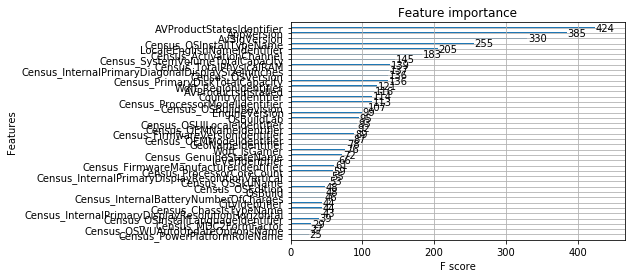

In [50]:
# feature importance
from xgboost import plot_importance
plot_importance(clf_xgb,max_num_features=40)

In [42]:
predictions_test = clf_xgb.predict(test)

print()
print(classification_report(yvalid, predictions_test))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
predictions_probas = clf_xgb.predict_proba(xvalid)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(yvalid, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

array([0.03231717, 0.24744397, 0.02270998, 0.05101896, 0.01777406,
       0.01560633, 0.00721813, 0.00321916, 0.01070394, 0.00787806,
       0.03886959, 0.02142605, 0.01053001, 0.00803647, 0.01641637,
       0.00793881, 0.00590297, 0.01352241, 0.01188203, 0.00137336,
       0.00692844, 0.00980276, 0.00594803, 0.02918996, 0.01838732,
       0.01319391, 0.00825104, 0.00578128, 0.00922889, 0.04683046,
       0.00593595, 0.02656549, 0.00129998, 0.00961676, 0.00932705,
       0.06120853, 0.00126917, 0.00948708, 0.0428944 , 0.00915106,
       0.00637865, 0.01591256, 0.00886191, 0.00999787, 0.00470563,
       0.02171303, 0.00286624, 0.03506312, 0.01241557], dtype=float32)